In [28]:
from functools import partial
import logging
from collections import OrderedDict

import numpy as np
from osgeo import gdal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import proxmin
from proxmin import nmf
import dc

plogger = logging.getLogger("proxmin")
plogger.setLevel(logging.DEBUG)

In [29]:
tbl = Table.read("data/skin_data.csv", format="ascii")

In [55]:
wavelength = np.array(tbl["col1"][1:]).astype(float)
spec = np.array(tbl["col4"][1:]).astype(float)

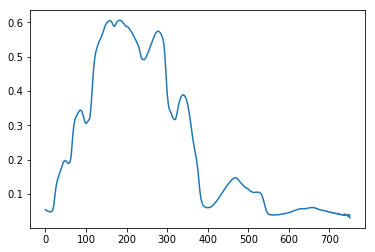

In [56]:
plt.plot(spec)

In [51]:
src

Wavelength,spectrum
str15,str6
250,0.0546
253,0.0536
256,0.0525
259,0.0516
262,0.0509
265,0.0503
268,0.0496
271,0.0492
274,0.0488


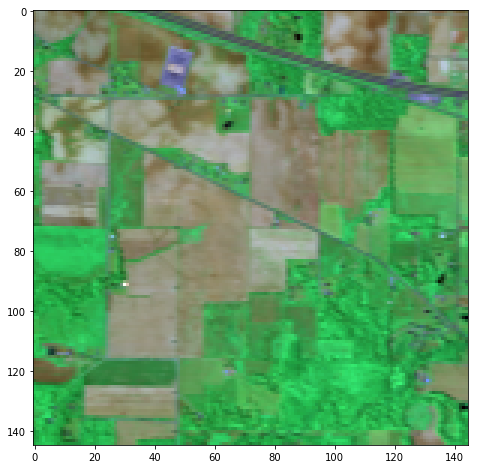

In [25]:
ds = gdal.Open('/Users/fred/Downloads/aviris_hyperspectral_data/19920612_AVIRIS_IndianPine_Site3.tif')
data_shape = ds.GetRasterBand(1).ReadAsArray().shape

# only use a subset of the image
shape = (ds.RasterCount, data_shape[0]*data_shape[1])
points = dc.ref_points

# Get hyperspectral data
data = np.zeros(shape)
for bidx in range(shape[0]):
    band = ds.GetRasterBand(bidx + 1).ReadAsArray()
    data[bidx] = band.flatten()
dc.plot_color_img(data, data_shape, figsize=(8,8), show=False);


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x1100813c0> >

In [26]:
shape

(220, 21025)

In [27]:
data_shape

(145, 145)

In [ ]:
B = 16
A = np.random.